# Lab | Unsupervised learning intro

### Instructions

--------------------------------------------------------------------------------------------------
It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this little project is to improve the recommendations of artists. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The experiments you did with the Spotify API and the Billboard web scraping will allow you to create a pipeline such that when the user enters a song, you:

1. Check whether or not the song is in the Billboard Hot 200.
2. Collect the audio features from the Spotify API.

After that, you want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

We want to have as many songs as possible to create the clustering model, so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.

--------------------------------------------------------------------------------------------------------

In [1]:
!pip install spotipy

In [2]:
# Testing spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="c43ae4f18c0d4b2c8b04c93649fa4b72",
                                                           client_secret="1f7865f1e7aa439e9e997bc38b591855"))

In [3]:
import numpy as np
import pandas as pd

# Importing the track features csv file
spotify_track_features = pd.read_csv(r"C:\Users\mafal\Documents\ironhack\labs\lab-unsupervised-learning-intro\files_for_lab\spotify_track_features.csv")
spotify_track_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.695,0.700,1,-1.587,0,0.0332,0.104000,0.000000,0.192,0.461,94.959,audio_features,2ikmBwZKZr0ahGcX4x8qtj,spotify:track:2ikmBwZKZr0ahGcX4x8qtj,https://api.spotify.com/v1/tracks/2ikmBwZKZr0a...,https://api.spotify.com/v1/audio-analysis/2ikm...,183296,4
1,0.593,0.741,4,-4.353,0,0.0359,0.022100,0.000000,0.393,0.460,96.978,audio_features,2MxErftY5S07dFtIdxQOSF,spotify:track:2MxErftY5S07dFtIdxQOSF,https://api.spotify.com/v1/tracks/2MxErftY5S07...,https://api.spotify.com/v1/audio-analysis/2MxE...,220670,4
2,0.660,0.765,2,-6.217,1,0.0299,0.125000,0.000956,0.235,0.681,123.051,audio_features,19meO0ADnoTjRuBMXZCdbs,spotify:track:19meO0ADnoTjRuBMXZCdbs,https://api.spotify.com/v1/tracks/19meO0ADnoTj...,https://api.spotify.com/v1/audio-analysis/19me...,175333,4
3,0.577,0.891,0,-4.672,1,0.0359,0.001230,0.000000,0.114,0.846,144.989,audio_features,3OPyobYAM5MgTm35AJV99O,spotify:track:3OPyobYAM5MgTm35AJV99O,https://api.spotify.com/v1/tracks/3OPyobYAM5Mg...,https://api.spotify.com/v1/audio-analysis/3OPy...,155707,4
4,0.531,0.693,6,-5.203,0,0.0374,0.009310,0.000003,0.119,0.555,157.960,audio_features,4nDfJDZaUVtwOSnGROb2GN,spotify:track:4nDfJDZaUVtwOSnGROb2GN,https://api.spotify.com/v1/tracks/4nDfJDZaUVtw...,https://api.spotify.com/v1/audio-analysis/4nDf...,164453,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,0.406,0.807,7,-3.871,1,0.0507,0.008350,0.000000,0.118,0.290,159.713,audio_features,38ODYA4I5jEhFr4xJJd1RG,spotify:track:38ODYA4I5jEhFr4xJJd1RG,https://api.spotify.com/v1/tracks/38ODYA4I5jEh...,https://api.spotify.com/v1/audio-analysis/38OD...,226861,3
3004,0.502,0.961,9,-4.389,1,0.0905,0.000075,0.000002,0.124,0.281,110.028,audio_features,3oGNDHK33fp1GMqU9e4HQ7,spotify:track:3oGNDHK33fp1GMqU9e4HQ7,https://api.spotify.com/v1/tracks/3oGNDHK33fp1...,https://api.spotify.com/v1/audio-analysis/3oGN...,234550,4
3005,0.639,0.832,1,-4.976,1,0.1180,0.003080,0.000382,0.121,0.482,119.045,audio_features,2jPqRiw1kJvxDKIibCPhHu,spotify:track:2jPqRiw1kJvxDKIibCPhHu,https://api.spotify.com/v1/tracks/2jPqRiw1kJvx...,https://api.spotify.com/v1/audio-analysis/2jPq...,166467,4
3006,0.741,0.810,11,-5.808,0,0.1650,0.002650,0.018400,0.131,0.799,132.076,audio_features,0mH0iiNINYULYFwszeqWnW,spotify:track:0mH0iiNINYULYFwszeqWnW,https://api.spotify.com/v1/tracks/0mH0iiNINYUL...,https://api.spotify.com/v1/audio-analysis/0mH0...,125455,4


In [4]:
# Checking what columns does the track features df contains
spotify_track_features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [5]:
# Importing the track data csv file
spotify_track_data = pd.read_csv(r"C:\Users\mafal\Documents\ironhack\labs\lab-unsupervised-learning-intro\files_for_lab\spotify_track_data.csv")
spotify_track_data

,artists,available_markets,disc_number,duration_ms,explicit,href,id,is_local,name,popularity,...,album.release_date,album.release_date_precision,album.total_tracks,album.type,album.uri,external_ids.isrc,external_urls.spotify,artist_name,artist_id,artist_genre
0,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,198123,False,https://api.spotify.com/v1/tracks/7hgIaQykdol1...,7hgIaQykdol1sWnj1uqBup,False,CULT CLASSIC,30,...,2023-11-10,day,6,album,spotify:album:3vw9IZ3YV2T5bqYTYG0IXr,QMRSZ2302147,https://open.spotify.com/track/7hgIaQykdol1sWn...,Holy Wars,2dTOWcCL0cYviin0Uz1lj4,dark pop
1,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,188808,False,https://api.spotify.com/v1/tracks/4pYiIZn2DKrK...,4pYiIZn2DKrK8MBYuS946R,False,BACKSTABBER,31,...,2024-01-05,day,1,album,spotify:album:1RFijpHOUqGPZ3hdvcm8IM,QZWFH2374284,https://open.spotify.com/track/4pYiIZn2DKrK8MB...,"Ergo, Bria",0AF9HrL08aOaZPsIiO8GmA,Unknown
2,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,93251,False,https://api.spotify.com/v1/tracks/1mj4y7NHlTq6...,1mj4y7NHlTq6YfTZOeNqOx,False,Tornillo,31,...,2023-11-16,day,1,album,spotify:album:6MSMis63C7wWLVSSmSl92b,USHR22316801,https://open.spotify.com/track/1mj4y7NHlTq6YfT...,Margaritas Podridas,5O9NicFLG2F9Xr7OHxmrb7,nu gaze
3,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,195226,False,https://api.spotify.com/v1/tracks/3xeyZGEEVW8S...,3xeyZGEEVW8SZPmteR9Fw6,False,Love Goes On,31,...,2023-05-12,day,1,album,spotify:album:30eJbXVjjtYtYtwkt337Sr,QZQAY2345784,https://open.spotify.com/track/3xeyZGEEVW8SZPm...,Kelsy Karter & The Heroines,2mAAO54PkHr3NjdlRpzEDl,alt z
4,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,155706,True,https://api.spotify.com/v1/tracks/3OPyobYAM5Mg...,3OPyobYAM5MgTm35AJV99O,False,you don't like me like that,31,...,2023-05-19,day,2,album,spotify:album:35YQAprIaYWKCWtr7iS5UT,USHR22316102,https://open.spotify.com/track/3OPyobYAM5MgTm3...,Zeph,502gYHkFCtLzBIcU4ctPLd,gen z singer-songwriter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,199906,True,https://api.spotify.com/v1/tracks/5W8YXBz9MTID...,5W8YXBz9MTIDyrpYaCg2Ky,False,Last Resort,81,...,2001-04-25,day,13,album,spotify:album:0BHa0ePkvGAVKymB4FU58m,USDW10021712,https://open.spotify.com/track/5W8YXBz9MTIDyrp...,Papa Roach,4RddZ3iHvSpGV4dvATac9X,alternative metal
3004,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,210240,False,https://api.spotify.com/v1/tracks/2DlHlPMa4M17...,2DlHlPMa4M17kufBvI2lEN,False,Chop Suey!,85,...,2001-09-04,day,15,album,spotify:album:6jWde94ln40epKIQCd8XUh,USSM10107256,https://open.spotify.com/track/2DlHlPMa4M17kuf...,System Of A Down,5eAWCfyUhZtHHtBdNk56l1,alternative metal
3005,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CL...",1,157333,False,https://api.spotify.com/v1/tracks/3K4HG9evC7dg...,3K4HG9evC7dg3N0R9cYqk4,False,One Step Closer,82,...,2000,year,15,album,spotify:album:6hPkbAV3ZXpGZBGUvL6jVM,USWB10002399,https://open.spotify.com/track/3K4HG9evC7dg3N0...,Linkin Park,6XyY86QOPPrYVGvF9ch6wz,alternative metal
3006,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,225306,True,https://api.spotify.com/v1/tracks/6nJPHXRpKYv2...,6nJPHXRpKYv2yqtalEjKy5,False,Got the Life,73,...,1998-08-18,day,14,album,spotify:album:0gsiszk6JWYwAyGvaTTud4,USSM19801763,https://open.spotify.com/track/6nJPHXRpKYv2yqt...,Korn,3RNrq3jvMZxD9ZyoOZbQOD,alternative metal


In [6]:
# Checking what columns does the track data df contains
spotify_track_data.columns

Index(['artists', 'available_markets', 'disc_number', 'duration_ms',
       'explicit', 'href', 'id', 'is_local', 'name', 'popularity',
       'preview_url', 'track_number', 'type', 'uri', 'album.album_type',
       'album.artists', 'album.available_markets',
       'album.external_urls.spotify', 'album.href', 'album.id', 'album.images',
       'album.name', 'album.release_date', 'album.release_date_precision',
       'album.total_tracks', 'album.type', 'album.uri', 'external_ids.isrc',
       'external_urls.spotify', 'artist_name', 'artist_id', 'artist_genre'],
      dtype='object')

In [10]:
spotify_track_data[['id', 'name', 'artist_name', 'artist_id', 'artist_genre']]

,id,name,artist_name,artist_id,artist_genre
0,7hgIaQykdol1sWnj1uqBup,CULT CLASSIC,Holy Wars,2dTOWcCL0cYviin0Uz1lj4,dark pop
1,4pYiIZn2DKrK8MBYuS946R,BACKSTABBER,"Ergo, Bria",0AF9HrL08aOaZPsIiO8GmA,Unknown
2,1mj4y7NHlTq6YfTZOeNqOx,Tornillo,Margaritas Podridas,5O9NicFLG2F9Xr7OHxmrb7,nu gaze
3,3xeyZGEEVW8SZPmteR9Fw6,Love Goes On,Kelsy Karter & The Heroines,2mAAO54PkHr3NjdlRpzEDl,alt z
4,3OPyobYAM5MgTm35AJV99O,you don't like me like that,Zeph,502gYHkFCtLzBIcU4ctPLd,gen z singer-songwriter
...,...,...,...,...,...
3003,5W8YXBz9MTIDyrpYaCg2Ky,Last Resort,Papa Roach,4RddZ3iHvSpGV4dvATac9X,alternative metal
3004,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,System Of A Down,5eAWCfyUhZtHHtBdNk56l1,alternative metal
3005,3K4HG9evC7dg3N0R9cYqk4,One Step Closer,Linkin Park,6XyY86QOPPrYVGvF9ch6wz,alternative metal
3006,6nJPHXRpKYv2yqtalEjKy5,Got the Life,Korn,3RNrq3jvMZxD9ZyoOZbQOD,alternative metal


------------------------------------------------------------------------------------------------
We need to get the audio features from the songs we extract on the Web Scraping lab.

----------------------------------------------------------------------------------------------

In [8]:
# Importing the other track features csv file
other_track_features = pd.read_csv(r"C:\Users\mafal\Documents\ironhack\labs\lab-unsupervised-learning-intro\files_for_lab\other_track_features.csv")
other_track_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.864,0.476,1,-10.068,1,0.4360,0.03740,0.000000,0.3740,0.647,157.144,audio_features,1vrFJDrysqmsNAgyjBzx4f,spotify:track:1vrFJDrysqmsNAgyjBzx4f,https://api.spotify.com/v1/tracks/1vrFJDrysqms...,https://api.spotify.com/v1/audio-analysis/1vrF...,137580,4
1,0.545,0.641,10,-6.398,0,0.0998,0.00453,0.000066,0.1710,0.464,121.892,audio_features,1Hohk6AufHZOrrhMXZppax,spotify:track:1Hohk6AufHZOrrhMXZppax,https://api.spotify.com/v1/tracks/1Hohk6AufHZO...,https://api.spotify.com/v1/audio-analysis/1Hoh...,215460,4
2,0.629,0.698,8,-4.485,1,0.3080,0.05090,0.001660,0.0909,0.599,117.765,audio_features,0UvZcEfpzVyx47QsRbjyBz,spotify:track:0UvZcEfpzVyx47QsRbjyBz,https://api.spotify.com/v1/tracks/0UvZcEfpzVyx...,https://api.spotify.com/v1/audio-analysis/0UvZ...,201816,4
3,0.732,0.703,11,-7.224,1,0.0314,0.10400,0.041700,0.1090,0.836,108.979,audio_features,5DRnssBoVo8e7uAQZkNT8O,spotify:track:5DRnssBoVo8e7uAQZkNT8O,https://api.spotify.com/v1/tracks/5DRnssBoVo8e...,https://api.spotify.com/v1/audio-analysis/5DRn...,156772,4
4,0.827,0.768,0,-5.702,1,0.2650,0.79000,0.000024,0.4970,0.734,99.988,audio_features,2FYGZDfsAnNsrm1gVbyKnG,spotify:track:2FYGZDfsAnNsrm1gVbyKnG,https://api.spotify.com/v1/tracks/2FYGZDfsAnNs...,https://api.spotify.com/v1/audio-analysis/2FYG...,137533,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.645,0.531,8,-6.239,1,0.0272,0.08520,0.000004,0.1550,0.537,125.986,audio_features,6ZXH6YfcouRBWanewWxuuz,spotify:track:6ZXH6YfcouRBWanewWxuuz,https://api.spotify.com/v1/tracks/6ZXH6YfcouRB...,https://api.spotify.com/v1/audio-analysis/6ZXH...,189027,3
149,0.582,0.537,0,-9.229,1,0.6190,0.12900,0.000000,0.0749,0.771,82.103,audio_features,0nqhKXDjsyBMvbeWmgijD0,spotify:track:0nqhKXDjsyBMvbeWmgijD0,https://api.spotify.com/v1/tracks/0nqhKXDjsyBM...,https://api.spotify.com/v1/audio-analysis/0nqh...,180930,4
150,0.429,0.181,3,-12.005,1,0.0412,0.73400,0.000008,0.1010,0.259,80.106,audio_features,1AU6deCmEZI4di2DzzEt0U,spotify:track:1AU6deCmEZI4di2DzzEt0U,https://api.spotify.com/v1/tracks/1AU6deCmEZI4...,https://api.spotify.com/v1/audio-analysis/1AU6...,316170,4
151,0.569,0.480,7,-7.533,1,0.0412,0.78100,0.082200,0.1000,0.353,123.700,audio_features,3cJI6VFdyRdriDVwB0sU3Y,spotify:track:3cJI6VFdyRdriDVwB0sU3Y,https://api.spotify.com/v1/tracks/3cJI6VFdyRdr...,https://api.spotify.com/v1/audio-analysis/3cJI...,234827,5


In [9]:
# Importing the other track data csv file
other_track_data = pd.read_csv(r"C:\Users\mafal\Documents\ironhack\labs\lab-unsupervised-learning-intro\files_for_lab\other_track_data.csv")
other_track_data

,artists,available_markets,disc_number,duration_ms,explicit,href,id,is_local,name,popularity,...,album.release_date,album.release_date_precision,album.total_tracks,album.type,album.uri,external_ids.isrc,external_urls.spotify,artist_name,artist_id,artist_genre
0,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,137579,True,https://api.spotify.com/v1/tracks/1vrFJDrysqms...,1vrFJDrysqmsNAgyjBzx4f,False,F.N.F. (Let's Go),59,...,2022-05-03,day,1,album,spotify:album:1FkcZKerCfWg4nUItVHf9B,QZRD92201643,https://open.spotify.com/track/1vrFJDrysqmsNAg...,Hitkidd,5pR1zWq3UPsOpW1pTWayLf,memphis hip hop
1,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,215459,True,https://api.spotify.com/v1/tracks/1Hohk6AufHZO...,1Hohk6AufHZOrrhMXZppax,False,ALIEN SUPERSTAR,73,...,2022-07-29,day,16,album,spotify:album:6FJxoadUE4JNVwWHghBwnb,USSM12206231,https://open.spotify.com/track/1Hohk6AufHZOrrh...,Beyoncé,6vWDO969PvNqNYHIOW5v0m,pop
2,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,201816,True,https://api.spotify.com/v1/tracks/0UvZcEfpzVyx...,0UvZcEfpzVyx47QsRbjyBz,False,El Apagón,70,...,2022-05-06,day,23,album,spotify:album:3RQQmkQEvNCY4prGKE6oc5,QM6MZ2214890,https://open.spotify.com/track/0UvZcEfpzVyx47Q...,Bad Bunny,4q3ewBCX7sLwd24euuV69X,reggaeton
3,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,156772,False,https://api.spotify.com/v1/tracks/5DRnssBoVo8e...,5DRnssBoVo8e7uAQZkNT8O,False,Runner,54,...,2022-09-23,day,13,album,spotify:album:6TzgWk5HZItbFmMT7hH4bU,GBCEL2200057,https://open.spotify.com/track/5DRnssBoVo8e7uA...,Alex G,6lcwlkAjBPSKnFBZjjZFJs,philly indie
4,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,137533,True,https://api.spotify.com/v1/tracks/2FYGZDfsAnNs...,2FYGZDfsAnNsrm1gVbyKnG,False,SAOKO,66,...,2022-03-18,day,16,album,spotify:album:6jbtHi5R0jMXoliU2OS0lo,USSM12109218,https://open.spotify.com/track/2FYGZDfsAnNsrm1...,ROSALÍA,7ltDVBr6mKbRvohxheJ9h1,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,189026,False,https://api.spotify.com/v1/tracks/6ZXH6YfcouRB...,6ZXH6YfcouRBWanewWxuuz,False,Automate,32,...,2021-11-05,day,10,album,spotify:album:0zNWhYDalgisc4uweLIGZJ,USMTD2100282,https://open.spotify.com/track/6ZXH6YfcouRBWan...,Snail Mail,4QkSD9TRUnMtI8Fq1jXJJe,art pop
152,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,180930,True,https://api.spotify.com/v1/tracks/0nqhKXDjsyBM...,0nqhKXDjsyBMvbeWmgijD0,False,Wockesha,64,...,2021-04-23,day,22,album,spotify:album:5ffogo3K3fYibGWa93IzUe,USUM72105621,https://open.spotify.com/track/0nqhKXDjsyBMvbe...,Moneybagg Yo,3tJoFztHeIJkJWMrx0td2f,memphis hip hop
153,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL...",1,316169,False,https://api.spotify.com/v1/tracks/1AU6deCmEZI4...,1AU6deCmEZI4di2DzzEt0U,False,Baby Grand,9,...,2021-01-29,day,10,album,spotify:album:3Jr2EYny7lPAoB1XPWaxe5,DED622000036,https://open.spotify.com/track/1AU6deCmEZI4di2...,Anna B Savage,6nbtlXRy0S6adYpDVoRdNi,NaN
154,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,234826,False,https://api.spotify.com/v1/tracks/3cJI6VFdyRdr...,3cJI6VFdyRdriDVwB0sU3Y,False,Avalon (with Francesco Turrisi),20,...,2021-04-09,day,12,album,spotify:album:75qSKqLqEt7zOei7If7Lms,USNO12100014,https://open.spotify.com/track/3cJI6VFdyRdriDV...,Rhiannon Giddens,1EI0NtLHoh9KBziYCeN1vM,black americana


--------------------------------------------------------------------------------------------------------
Let's now concat both dfs spotify tracks and other tracks to get a larger dataset for our song recommender.

--------------------------------------------------------------------------------------------------------

In [11]:
# Concatenate DataFrames by appending rows
track_features = pd.concat([spotify_track_features, other_track_features], ignore_index=True)
track_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.695,0.700,1,-1.587,0,0.0332,0.10400,0.000000,0.1920,0.461,94.959,audio_features,2ikmBwZKZr0ahGcX4x8qtj,spotify:track:2ikmBwZKZr0ahGcX4x8qtj,https://api.spotify.com/v1/tracks/2ikmBwZKZr0a...,https://api.spotify.com/v1/audio-analysis/2ikm...,183296,4
1,0.593,0.741,4,-4.353,0,0.0359,0.02210,0.000000,0.3930,0.460,96.978,audio_features,2MxErftY5S07dFtIdxQOSF,spotify:track:2MxErftY5S07dFtIdxQOSF,https://api.spotify.com/v1/tracks/2MxErftY5S07...,https://api.spotify.com/v1/audio-analysis/2MxE...,220670,4
2,0.660,0.765,2,-6.217,1,0.0299,0.12500,0.000956,0.2350,0.681,123.051,audio_features,19meO0ADnoTjRuBMXZCdbs,spotify:track:19meO0ADnoTjRuBMXZCdbs,https://api.spotify.com/v1/tracks/19meO0ADnoTj...,https://api.spotify.com/v1/audio-analysis/19me...,175333,4
3,0.577,0.891,0,-4.672,1,0.0359,0.00123,0.000000,0.1140,0.846,144.989,audio_features,3OPyobYAM5MgTm35AJV99O,spotify:track:3OPyobYAM5MgTm35AJV99O,https://api.spotify.com/v1/tracks/3OPyobYAM5Mg...,https://api.spotify.com/v1/audio-analysis/3OPy...,155707,4
4,0.531,0.693,6,-5.203,0,0.0374,0.00931,0.000003,0.1190,0.555,157.960,audio_features,4nDfJDZaUVtwOSnGROb2GN,spotify:track:4nDfJDZaUVtwOSnGROb2GN,https://api.spotify.com/v1/tracks/4nDfJDZaUVtw...,https://api.spotify.com/v1/audio-analysis/4nDf...,164453,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,0.645,0.531,8,-6.239,1,0.0272,0.08520,0.000004,0.1550,0.537,125.986,audio_features,6ZXH6YfcouRBWanewWxuuz,spotify:track:6ZXH6YfcouRBWanewWxuuz,https://api.spotify.com/v1/tracks/6ZXH6YfcouRB...,https://api.spotify.com/v1/audio-analysis/6ZXH...,189027,3
3157,0.582,0.537,0,-9.229,1,0.6190,0.12900,0.000000,0.0749,0.771,82.103,audio_features,0nqhKXDjsyBMvbeWmgijD0,spotify:track:0nqhKXDjsyBMvbeWmgijD0,https://api.spotify.com/v1/tracks/0nqhKXDjsyBM...,https://api.spotify.com/v1/audio-analysis/0nqh...,180930,4
3158,0.429,0.181,3,-12.005,1,0.0412,0.73400,0.000008,0.1010,0.259,80.106,audio_features,1AU6deCmEZI4di2DzzEt0U,spotify:track:1AU6deCmEZI4di2DzzEt0U,https://api.spotify.com/v1/tracks/1AU6deCmEZI4...,https://api.spotify.com/v1/audio-analysis/1AU6...,316170,4
3159,0.569,0.480,7,-7.533,1,0.0412,0.78100,0.082200,0.1000,0.353,123.700,audio_features,3cJI6VFdyRdriDVwB0sU3Y,spotify:track:3cJI6VFdyRdriDVwB0sU3Y,https://api.spotify.com/v1/tracks/3cJI6VFdyRdr...,https://api.spotify.com/v1/audio-analysis/3cJI...,234827,5


In [12]:
print(track_features['type'].unique())

['audio_features']


In [13]:
# Concatenate DataFrames by appending rows
track_data = pd.concat([spotify_track_data, other_track_data], ignore_index=True)
track_data

,artists,available_markets,disc_number,duration_ms,explicit,href,id,is_local,name,popularity,...,album.release_date,album.release_date_precision,album.total_tracks,album.type,album.uri,external_ids.isrc,external_urls.spotify,artist_name,artist_id,artist_genre
0,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,198123,False,https://api.spotify.com/v1/tracks/7hgIaQykdol1...,7hgIaQykdol1sWnj1uqBup,False,CULT CLASSIC,30,...,2023-11-10,day,6,album,spotify:album:3vw9IZ3YV2T5bqYTYG0IXr,QMRSZ2302147,https://open.spotify.com/track/7hgIaQykdol1sWn...,Holy Wars,2dTOWcCL0cYviin0Uz1lj4,dark pop
1,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,188808,False,https://api.spotify.com/v1/tracks/4pYiIZn2DKrK...,4pYiIZn2DKrK8MBYuS946R,False,BACKSTABBER,31,...,2024-01-05,day,1,album,spotify:album:1RFijpHOUqGPZ3hdvcm8IM,QZWFH2374284,https://open.spotify.com/track/4pYiIZn2DKrK8MB...,"Ergo, Bria",0AF9HrL08aOaZPsIiO8GmA,Unknown
2,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,93251,False,https://api.spotify.com/v1/tracks/1mj4y7NHlTq6...,1mj4y7NHlTq6YfTZOeNqOx,False,Tornillo,31,...,2023-11-16,day,1,album,spotify:album:6MSMis63C7wWLVSSmSl92b,USHR22316801,https://open.spotify.com/track/1mj4y7NHlTq6YfT...,Margaritas Podridas,5O9NicFLG2F9Xr7OHxmrb7,nu gaze
3,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,195226,False,https://api.spotify.com/v1/tracks/3xeyZGEEVW8S...,3xeyZGEEVW8SZPmteR9Fw6,False,Love Goes On,31,...,2023-05-12,day,1,album,spotify:album:30eJbXVjjtYtYtwkt337Sr,QZQAY2345784,https://open.spotify.com/track/3xeyZGEEVW8SZPm...,Kelsy Karter & The Heroines,2mAAO54PkHr3NjdlRpzEDl,alt z
4,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,155706,True,https://api.spotify.com/v1/tracks/3OPyobYAM5Mg...,3OPyobYAM5MgTm35AJV99O,False,you don't like me like that,31,...,2023-05-19,day,2,album,spotify:album:35YQAprIaYWKCWtr7iS5UT,USHR22316102,https://open.spotify.com/track/3OPyobYAM5MgTm3...,Zeph,502gYHkFCtLzBIcU4ctPLd,gen z singer-songwriter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,189026,False,https://api.spotify.com/v1/tracks/6ZXH6YfcouRB...,6ZXH6YfcouRBWanewWxuuz,False,Automate,32,...,2021-11-05,day,10,album,spotify:album:0zNWhYDalgisc4uweLIGZJ,USMTD2100282,https://open.spotify.com/track/6ZXH6YfcouRBWan...,Snail Mail,4QkSD9TRUnMtI8Fq1jXJJe,art pop
3160,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,180930,True,https://api.spotify.com/v1/tracks/0nqhKXDjsyBM...,0nqhKXDjsyBMvbeWmgijD0,False,Wockesha,64,...,2021-04-23,day,22,album,spotify:album:5ffogo3K3fYibGWa93IzUe,USUM72105621,https://open.spotify.com/track/0nqhKXDjsyBMvbe...,Moneybagg Yo,3tJoFztHeIJkJWMrx0td2f,memphis hip hop
3161,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL...",1,316169,False,https://api.spotify.com/v1/tracks/1AU6deCmEZI4...,1AU6deCmEZI4di2DzzEt0U,False,Baby Grand,9,...,2021-01-29,day,10,album,spotify:album:3Jr2EYny7lPAoB1XPWaxe5,DED622000036,https://open.spotify.com/track/1AU6deCmEZI4di2...,Anna B Savage,6nbtlXRy0S6adYpDVoRdNi,NaN
3162,[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",1,234826,False,https://api.spotify.com/v1/tracks/3cJI6VFdyRdr...,3cJI6VFdyRdriDVwB0sU3Y,False,Avalon (with Francesco Turrisi),20,...,2021-04-09,day,12,album,spotify:album:75qSKqLqEt7zOei7If7Lms,USNO12100014,https://open.spotify.com/track/3cJI6VFdyRdriDV...,Rhiannon Giddens,1EI0NtLHoh9KBziYCeN1vM,black americana


###### 1. Creating the clusters

---------------------------------------------------------------------------------------------
We'll first start by creating the cluster using the track features.

----------------------------------------------------------------------------------------------------

In [14]:
X = track_features[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
                    'duration_ms', 'time_signature']].copy()

In [15]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.695,0.700,1,-1.587,0,0.0332,0.10400,0.000000,0.1920,0.461,94.959,183296,4
1,0.593,0.741,4,-4.353,0,0.0359,0.02210,0.000000,0.3930,0.460,96.978,220670,4
2,0.660,0.765,2,-6.217,1,0.0299,0.12500,0.000956,0.2350,0.681,123.051,175333,4
3,0.577,0.891,0,-4.672,1,0.0359,0.00123,0.000000,0.1140,0.846,144.989,155707,4
4,0.531,0.693,6,-5.203,0,0.0374,0.00931,0.000003,0.1190,0.555,157.960,164453,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,0.645,0.531,8,-6.239,1,0.0272,0.08520,0.000004,0.1550,0.537,125.986,189027,3
3157,0.582,0.537,0,-9.229,1,0.6190,0.12900,0.000000,0.0749,0.771,82.103,180930,4
3158,0.429,0.181,3,-12.005,1,0.0412,0.73400,0.000008,0.1010,0.259,80.106,316170,4
3159,0.569,0.480,7,-7.533,1,0.0412,0.78100,0.082200,0.1000,0.353,123.700,234827,5


In [16]:
# K-Means is a distance based algorithm: we need to scale / normalize:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

pd.DataFrame(X_prep).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.188139,-0.467066,-1.184953,1.424857,-1.187139,-0.760976,0.012327,-0.431478,-0.175442,0.168173,-1.105236,-0.540963,0.202327
1,0.551651,-0.257643,-0.335666,0.496538,-1.187139,-0.727932,-0.367133,-0.431478,1.068866,0.163737,-1.040129,-0.095232,0.202327
2,0.969736,-0.135053,-0.901857,-0.129054,0.842361,-0.801363,0.109625,-0.427837,0.090753,1.144069,-0.199338,-0.635932,0.202327
3,0.451810,0.508541,-1.468048,0.389476,0.842361,-0.727932,-0.463828,-0.431478,-0.658308,1.875991,0.508109,-0.869996,0.202327
4,0.164766,-0.502822,0.230524,0.211262,-1.187139,-0.709575,-0.426392,-0.431467,-0.627355,0.585146,0.926392,-0.765689,0.202327


----------------------------------------------------------------------------------------------
For the number of clusters we could choose the number of different music genres present in our tracks' list, 27:
- Nu-Metal
- Alternative Metal
- Progressive Metal
- Black Metal
- Grunge
- Punk
- Pure Pop Punk
- Alternative Rock 
- Blues Rock 
- Mordern Blues Rock
- Hard Rock
- New Alt Rock 
- Mordern Rock 
- Rock Pop 
- Indie
- Pop
- Jazz 
- Mordern Jazz 
- Sad Soul
- Trap
- Hip-Hop 
- Rap 
- Rap Tuga
- Alternative Beats
- Rocktronic
- Techno Rave
- Fierce Femmes

Or we could use the exact number of different artist genres in our playlist

---------------------------------------------------------------------------------------------------

In [17]:
# Counting the number of unique values in the 'artist_genre' column
unique_genres_count = track_data['artist_genre'].nunique()

print(f"Number of unique artist genres: {unique_genres_count}")

Number of unique artist genres: 512


----------------------------------------------------------------------------------------------
512 clusters might be too much. 

Let's Calculate the Silhouette Score to help us determine which number of clusters is more suited: 512 or 27.

-------------------------------------------------------------------------------------------------

In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=512, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)

print(f"Silhouette Score for 512 clusters: {silhouette_avg:.512f}")

C:\Users\mafal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 512 clusters: 0.55569951077141088724431483569787815213203430175781250000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [19]:
# Perform clustering using KMeans
kmeans = KMeans(n_clusters=27, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)

print(f"Silhouette Score for 27 clusters: {silhouette_avg:.27}")

C:\Users\mafal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 27 clusters: 0.524543302707103586968173659


-----------------------------------------------------------------------------------------------------
The higher score (0.556) suggests that, on average, the clusters are more cohesive (samples within a cluster are closer to each other) and more separate from other clusters compared to the configuration with a score of 0.525. This generally means that the clustering with a Silhouette Score of 0.556 does a better job of grouping your data in a meaningful way.

When deciding on the best clustering configuration, a higher Silhouette Score is a useful indicator of a better fit, but it's also important to consider:

- Practical Interpretability: How meaningful are the clusters in the context of your specific application or analysis? Sometimes, a slightly lower score may be acceptable or even preferable if the clustering results are more interpretable or actionable.
- Cluster Number: The number of clusters selected (e.g., 27 clusters) should also make sense for your application. Too many clusters can complicate interpretation and might not add value.
- Domain Knowledge: Expert insights or domain knowledge can provide additional context that might not be captured by the data alone.

Given that the difference between the scores is not that big we'll opt for 27 clusters since too many clusters can complicate interpretation.

------------------------------------------------------------------------------------------------------

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=27, random_state=42)
kmeans.fit(X_prep)

C:\Users\mafal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=27, random_state=42)

In [22]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)
clusters

array([ 5,  5, 12, ..., 26, 26, 11])

In [23]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     149
1     185
2     149
3     193
4      41
5     239
6      49
7     120
8      26
9      40
10    112
11     46
12    145
13     12
14    133
15     48
16    126
17    108
18    100
19    132
20    112
21    205
22    135
23    164
24    104
25    161
26    127
Name: count, dtype: int64

In [24]:
# Explore the cluster assignment in the original dataset
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters

# Example dictionary that maps original cluster numbers to new ones
# This is a direct mapping (no change), but you can modify as per your requirement
cluster_mapping = {i: i for i in range(27)}

# Applying the mapping
X_df['cluster'] = X_df['cluster'].apply(lambda x: cluster_mapping[x])

X_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.695,0.700,1,-1.587,0,0.0332,0.10400,0.000000,0.1920,0.461,94.959,183296,4,5
1,0.593,0.741,4,-4.353,0,0.0359,0.02210,0.000000,0.3930,0.460,96.978,220670,4,5
2,0.660,0.765,2,-6.217,1,0.0299,0.12500,0.000956,0.2350,0.681,123.051,175333,4,12
3,0.577,0.891,0,-4.672,1,0.0359,0.00123,0.000000,0.1140,0.846,144.989,155707,4,12
4,0.531,0.693,6,-5.203,0,0.0374,0.00931,0.000003,0.1190,0.555,157.960,164453,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,0.645,0.531,8,-6.239,1,0.0272,0.08520,0.000004,0.1550,0.537,125.986,189027,3,18
3157,0.582,0.537,0,-9.229,1,0.6190,0.12900,0.000000,0.0749,0.771,82.103,180930,4,24
3158,0.429,0.181,3,-12.005,1,0.0412,0.73400,0.000008,0.1010,0.259,80.106,316170,4,26
3159,0.569,0.480,7,-7.533,1,0.0412,0.78100,0.082200,0.1000,0.353,123.700,234827,5,26


In [25]:
# "performance metric"
kmeans.inertia_

16471.44269392305

In [26]:
# Choosing the best K

K = range(2, 20)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

inertia

C:\Users\mafal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mafal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mafal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mafal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[35505.66644143819,
 32228.53869193905,
 29826.103578126313,
 28138.44421743058,
 26576.89830426013,
 25133.918958301907,
 24092.514190344802,
 23253.404780826677,
 22509.965324111752,
 21564.190996078705,
 20869.147258172845,
 20443.382349643085,
 19933.71364516687,
 19586.220157341435,
 19148.211275341087,
 18827.897217053895,
 18528.40482665381,
 18212.774993028204]

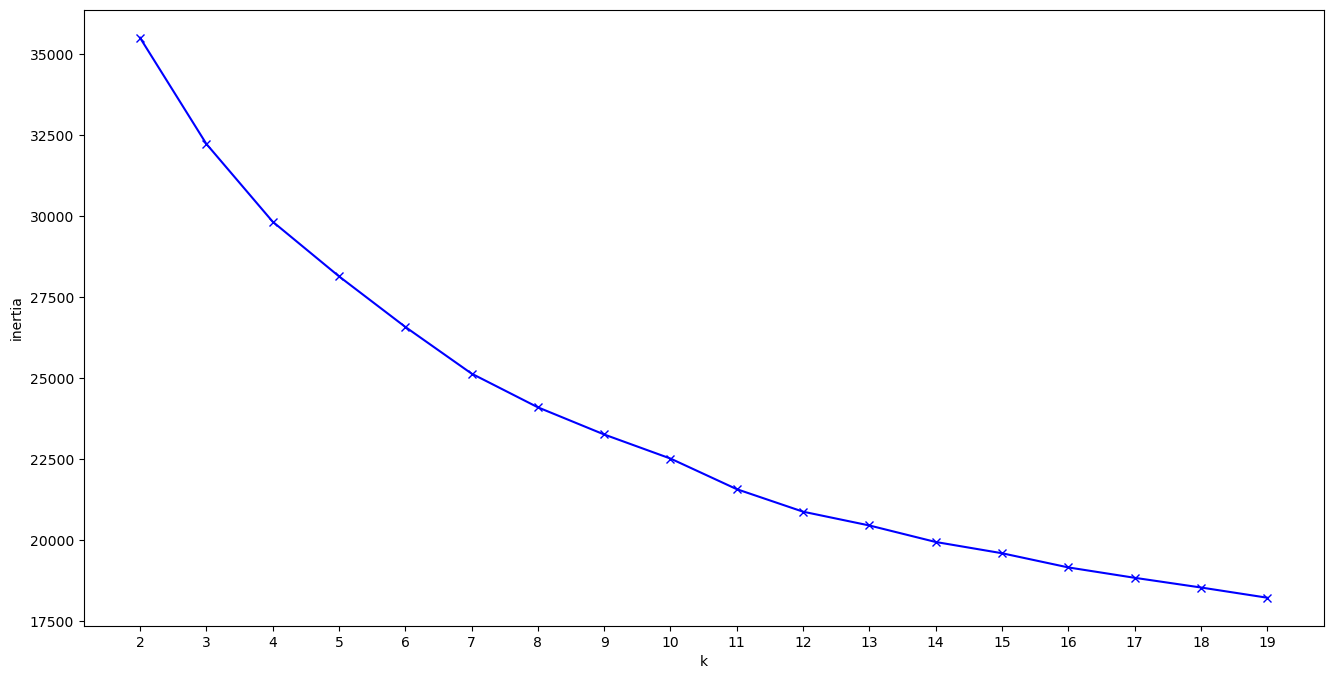

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

C:\Users\mafal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mafal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mafal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mafal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

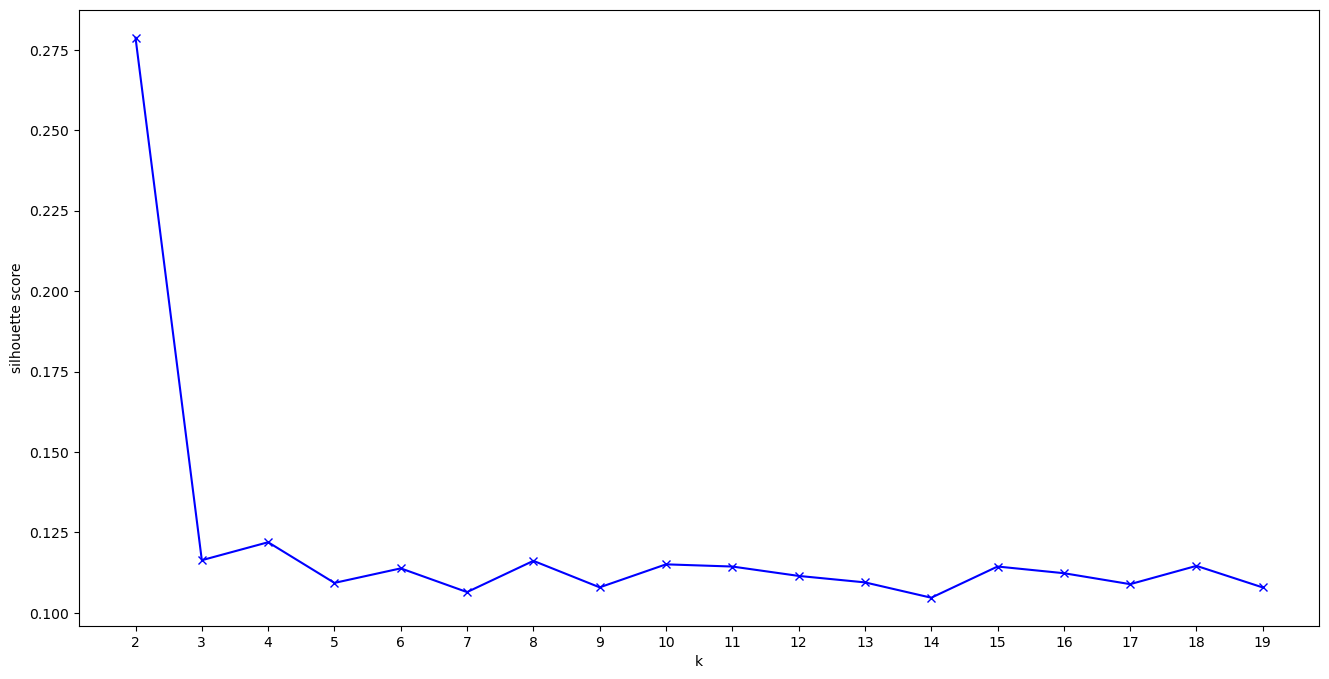

In [28]:
from sklearn.metrics import silhouette_score
K = range(2, 20)

silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

---------------------------------------------------------------------------------------
Visualizing Results

--------------------------------------------------------------------------------------

In [29]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Transform the data into 2D so we can see
pca = PCA(2)
X_2D = pca.fit_transform(X_prep)
X_2D

array([[ 0.01711441, -1.43110468],
       [-0.14930965, -0.70154729],
       [ 0.42284537, -1.63731895],
       ...,
       [ 4.75821038,  0.72512672],
       [ 2.8743374 , -0.92751507],
       [ 2.69863242,  1.93415689]])

In [30]:
kmeans = KMeans(n_clusters=27, random_state=42)
kmeans.fit(X_2D)

C:\Users\mafal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=27, random_state=42)

In [31]:
clusters = kmeans.predict(X_2D)
clusters

array([ 1, 15, 26, ..., 23, 13,  3])

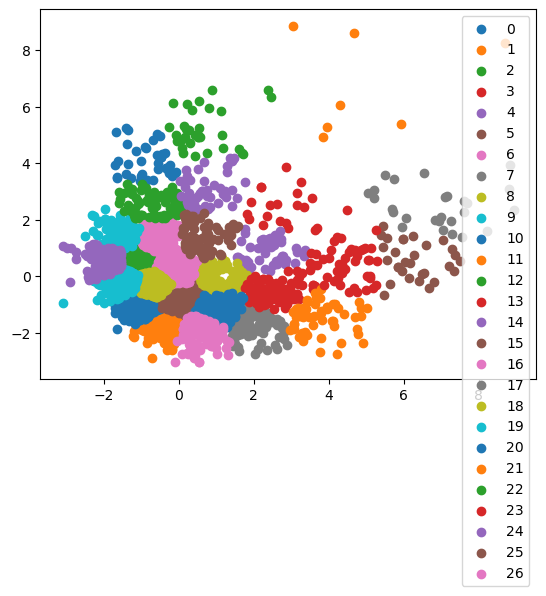

In [32]:
labels = np.unique(clusters)

for i in labels:
    plt.scatter(X_2D[clusters == i , 0] , X_2D[clusters == i , 1] , label = i)
plt.legend()
plt.show()

In [33]:
df = pd.DataFrame(X_2D)
df['cluster'] = clusters
df

,0,1,cluster
0,0.017114,-1.431105,1
1,-0.149310,-0.701547,15
2,0.422845,-1.637319,26
3,-0.601281,-1.847737,1
4,-0.147349,-0.911830,15
...,...,...,...
3156,1.173906,-0.585241,8
3157,1.196749,-1.703601,20
3158,4.758210,0.725127,23
3159,2.874337,-0.927515,13


In [34]:
cluster_mapping = {i: i for i in range(27)}

# Create a new Series from 'clusters' and apply the mapping
clusters_mapped = pd.Series(clusters).apply(lambda x: cluster_mapping[x])

# If clusters_mapped should replace the original clusters
clusters = clusters_mapped

In [35]:
# Getting nearest point
from sklearn.metrics import pairwise_distances_argmin_min

X = X_df.drop('cluster', axis=1)
closest, _ = pairwise_distances_argmin_min(X.loc[[132]], X)
# here, this X.loc[[0]] would be representing "a new song"
closest

array([132], dtype=int64)

In [36]:
results = sp.search(q='artist:Black Midi, ducter', limit=32, type='track')
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=artist%3ABlack+Midi%2C+ducter&type=track&offset=0&limit=32',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7Hvq85OU8T7Hsd63zNBwaL'},
       'href': 'https://api.spotify.com/v1/artists/7Hvq85OU8T7Hsd63zNBwaL',
       'id': '7Hvq85OU8T7Hsd63zNBwaL',
       'name': 'black midi',
       'type': 'artist',
       'uri': 'spotify:artist:7Hvq85OU8T7Hsd63zNBwaL'}],
     'available_markets': ['AR',
      'AU',
      'AT',
      'BE',
      'BO',
      'BR',
      'BG',
      'CA',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DK',
      'DO',
      'DE',
      'EC',
      'EE',
      'SV',
      'FI',
      'FR',
      'GR',
      'GT',
      'HN',
      'HK',
      'HU',
      'IS',
      'IE',
      'IT',
      'LV',
      'LT',
      'LU',
      'MY',
      'MT',
      'MX',
      'NL',
      'NZ',
      'NI',
      'NO',
      'PA',

In [37]:
track = pd.json_normalize(sp.audio_features('1VsGcIEJBSwxMMA2QuaLo1'))
track

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.372,0.668,0,-8.182,1,0.0606,0.0115,0.0497,0.112,0.245,148.04,audio_features,1VsGcIEJBSwxMMA2QuaLo1,spotify:track:1VsGcIEJBSwxMMA2QuaLo1,https://api.spotify.com/v1/tracks/1VsGcIEJBSwx...,https://api.spotify.com/v1/audio-analysis/1VsG...,402093,4


In [38]:
track = track[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
                    'duration_ms', 'time_signature']]
track

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.372,0.668,0,-8.182,1,0.0606,0.0115,0.0497,0.112,0.245,148.04,402093,4


In [39]:
closest, _ = pairwise_distances_argmin_min(track, X)
# here, this X.loc[[0]] would be representing "a new song"
closest

array([3036], dtype=int64)

In [40]:
track_features.loc[[3036]]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
3036,0.154,0.00458,0,-28.608,1,0.0448,0.959,0.952,0.108,0.0918,75.517,audio_features,0KgSqUAo5E2DZ0xGA2IvnL,spotify:track:0KgSqUAo5E2DZ0xGA2IvnL,https://api.spotify.com/v1/tracks/0KgSqUAo5E2D...,https://api.spotify.com/v1/audio-analysis/0KgS...,402040,5


In [41]:
track_data.loc[track_data['id'] == '0KgSqUAo5E2DZ0xGA2IvnL', ['name', 'artist_name']]

,name,artist_name
3040,Peace Piece,Sean Shibe


In [42]:
results = sp.search(q='artist:Arctic Monkeys, Brianstorm', limit=32, type='track')
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=artist%3AArctic+Monkeys%2C+Brianstorm&type=track&offset=0&limit=32',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7Ln80lUS6He07XvHI8qqHH'},
       'href': 'https://api.spotify.com/v1/artists/7Ln80lUS6He07XvHI8qqHH',
       'id': '7Ln80lUS6He07XvHI8qqHH',
       'name': 'Arctic Monkeys',
       'type': 'artist',
       'uri': 'spotify:artist:7Ln80lUS6He07XvHI8qqHH'}],
     'available_markets': ['CA', 'US'],
     'external_urls': {'spotify': 'https://open.spotify.com/album/6rsQnwaoJHxXJRCDBPkBRw'},
     'href': 'https://api.spotify.com/v1/albums/6rsQnwaoJHxXJRCDBPkBRw',
     'id': '6rsQnwaoJHxXJRCDBPkBRw',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b2730c8ac83035e9588e8ad34b90',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e020c8ac83035e9588e8ad34b90',
      

In [43]:
track = pd.json_normalize(sp.audio_features('6RUwlBcK959CotJDxHh0QU'))
track

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.42,0.974,1,-4.706,1,0.191,0.000082,0.00155,0.0871,0.463,165.182,audio_features,6RUwlBcK959CotJDxHh0QU,spotify:track:6RUwlBcK959CotJDxHh0QU,https://api.spotify.com/v1/tracks/6RUwlBcK959C...,https://api.spotify.com/v1/audio-analysis/6RUw...,172867,4


In [44]:
track = track[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
                    'duration_ms', 'time_signature']]
track

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.42,0.974,1,-4.706,1,0.191,0.000082,0.00155,0.0871,0.463,165.182,172867,4


In [45]:
closest, _ = pairwise_distances_argmin_min(track, X)
# here, this X.loc[[0]] would be representing "a new song"
closest

array([63], dtype=int64)

In [46]:
track_features.loc[[63]]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
63,0.605,0.819,7,-5.932,0,0.0291,0.0184,0.158,0.101,0.76,120.009,audio_features,1FE3y5rW4l9I7prqRLnLi4,spotify:track:1FE3y5rW4l9I7prqRLnLi4,https://api.spotify.com/v1/tracks/1FE3y5rW4l9I...,https://api.spotify.com/v1/audio-analysis/1FE3...,172868,4


In [47]:
track_data.loc[track_data['id'] == '1FE3y5rW4l9I7prqRLnLi4', ['name', 'artist_name']]

,name,artist_name
53,Bang Bang,Momma
1191,Bang Bang,Momma
